In [1]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
import math

# Question 2

# part2

In [2]:
def calc_hist(image):
    '''
    Do not use libraries
    calculate image histogram
    input(s):
      image (ndarray): input image
    output(s):
      hist (ndarray): computed input image histogram
    '''
    hist = np.zeros(256,dtype=int)

    # flatten() converts the 2D array to 1D array
    one_D_image = image.flatten() 

    # bincount() counts the number of occurences of each pixel value
    hist = np.bincount(one_D_image, minlength=256) 

    # alternative way:
    # for row in image:
    #     for pixel in row:
    #         val = int(pixel)
    #         hist[val] += 1

    return hist

In [7]:
def calc_cdf(channel):
  '''
    Do not use libraries
    calculate image cdf
    input(s):
      channel (ndarray): input image channel
    output(s):
      cdf (ndarray): computed cdf for input image channel
  '''

  hist = calc_hist(channel)

  # computes the cumulative sum of the histogram values
  cdf = np.cumsum(hist) 

  # alternative way:
  # cdf = np.zeros(256, dtype=int) 
  # cdf[0] = hist[0]
  #   for i in range(1, 256):
  #       cdf[i] = cdf[i-1] + hist[i]

  return cdf

In [1]:
def hist_matching(src_image,ref_image):
  '''
  don't use libraries
  input(s):
    src_image (ndarray): source image
    ref_image (ndarray): reference image
  output(s):
    output_image (ndarray): transformation of source image so that its histogram matches histogram of refrence image
  '''
  output_image = src_image.copy()
  channels = [(0, 'blue'), (1, 'green'), (2, 'red')]
  for channel, _ in channels:
    src_channel = src_image[:, :, channel]
    ref_channel = ref_image[:, :, channel]
    src_cdf = calc_cdf(src_channel)
    ref_cdf = calc_cdf(ref_channel)

    # normalize CDFs to 0-255
    src_cdf_normalized = (src_cdf - src_cdf.min()) * 255 / (src_cdf.max() - src_cdf.min())
    ref_cdf_normalized = (ref_cdf - ref_cdf.min()) * 255 / (ref_cdf.max() - ref_cdf.min())
    
    # create a lookup table
    lookup_table = np.interp(src_cdf_normalized, ref_cdf_normalized, np.arange(256))
    
    # apply the lookup table to transform the source image channel
    output_image[:, :, channel] = lookup_table[src_channel]

  return output_image

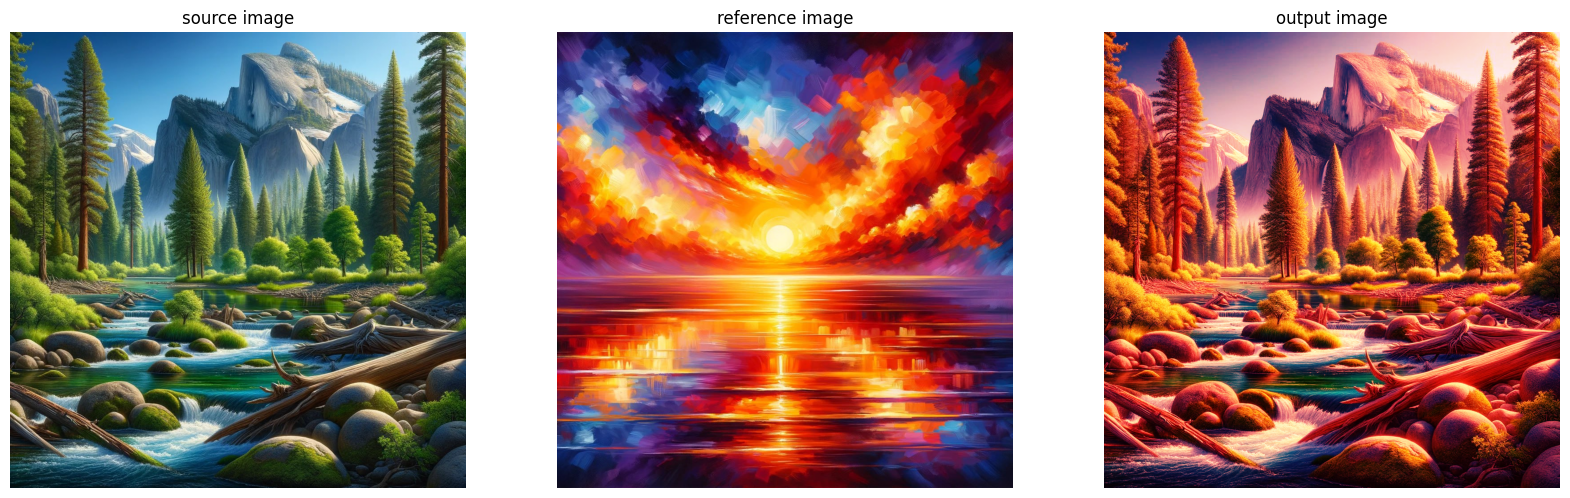

In [11]:
# Do not change this cell
src = cv2.imread('input.png')
ref = cv2.imread('ref.png')
Array = [src, ref, hist_matching(src,ref)]
titles = ['source image', 'reference image', 'output image']
plt.figure(figsize=(20,20))
for i in range(3):
  plt.subplot(1,3,i+1)
  plt.imshow(Array[i][:,:,::-1])
  plt.title(titles[i])
  plt.axis('off')

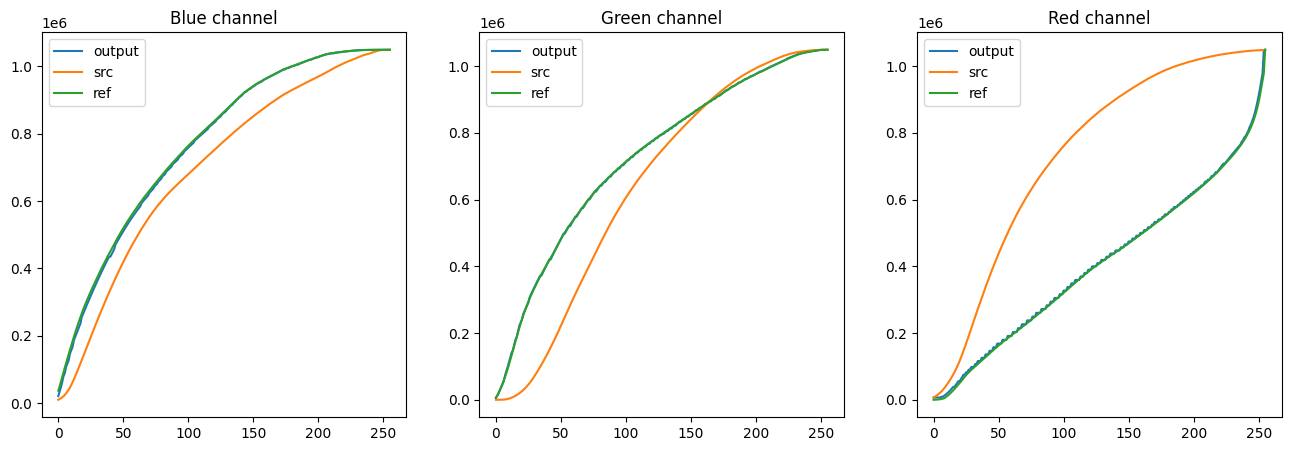

In [6]:
# Do not change this cell
fig = plt.figure(figsize= (16, 5))
channels = [(0, 'Blue channel'), (1, 'Green channel'), (2, 'Red channel')]
output = hist_matching(src,ref)
for channel, title in channels:
    fig.add_subplot(1, 3, channel+ 1)
    a = calc_cdf(output[:,:,channel])
    b = calc_cdf(src[:,:,channel])
    c = calc_cdf(ref[:,:,channel])
    plt.plot(a,label='output')
    plt.plot(b,label='src')
    plt.plot(c,label='ref')
    plt.legend()
    plt.title(title)